# Miniproject - EDA on TMDB dataset

# Importing required packages

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
# Loading the tmbd dataset
df=pd.read_csv(r"C:\Users\KAVYA SNIGDHA\Downloads\tmdb-movies.csv")

In [81]:
# Checking the info of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [82]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Checking zero valued columns

In [83]:
df_budget_zero = df.query('budget == 0')
df_revenue_zero = df.query('revenue == 0')
df_runtime_zero=df.query("runtime==0")
df_cast_zero=df.query("cast==0")
df_director_zero=df.query("director==0")
df_genres_zero=df.query("genres==0")

In [84]:
df_revenue_zero.count()

id                      6016
imdb_id                 6006
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
keywords                4758
overview                6012
runtime                 6016
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64

In [85]:
df_budget_zero.count()

id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64

In [86]:
df_budget_zero.count()

id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64

In [87]:
df_genres_zero.count()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [88]:
df_cast_zero.count()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [89]:
df_director_zero.count()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

# Cleaning data
##### Drop unnecessary columns: homepage, tagline, imdb_id, overview,budget_adj, revenue_adj.
##### Drop duplicates.
##### Drop null values columns that with small quantity of nulls : cast, director, and genres.
##### Replace zero values with null values in the budget and revenue column.
##### Drop zero values columns that with small quantity of zeros : runtime.

In [90]:
col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df.drop(col, axis=1, inplace=True)

In [91]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [92]:
c=["cast","director","genres"]
df.dropna(subset=c,how="any",inplace=True)

In [93]:
#checking null values info for columns
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [94]:
col=["keywords","production_companies"]
df.drop(col,axis=1,inplace=True)

In [95]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [254]:
#replacing zero values in budget with null instead of dropping them,
#because there are large number of zero valued columns dropping of which causes loss of authenticity of data


df["budget"]=df["budget"].replace(0,np.NaN)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10703 non-null  int64         
 1   popularity      10703 non-null  float64       
 2   budget          5150 non-null   float64       
 3   revenue         4843 non-null   float64       
 4   original_title  10703 non-null  object        
 5   director        10703 non-null  object        
 6   runtime         10703 non-null  int64         
 7   release_date    10703 non-null  datetime64[ns]
 8   vote_count      10703 non-null  int64         
 9   vote_average    10703 non-null  float64       
 10  release_year    10703 non-null  int64         
 11  profit          3849 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 1.4+ MB


In [97]:
df_runtime_zero.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11-09-2015,80,6.5,2015,0.0,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,01-01-2015,15,5.6,2015,0.0,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10-09-2015,52,5.0,2015,0.0,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,04-05-2015,11,5.4,2015,0.0,0.0


In [98]:
# dropping zero runtime valued data instead of replacing with null
df.query("runtime!=0",inplace=True)

In [99]:
df.query("runtime==0")

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10703 non-null  int64  
 1   popularity      10703 non-null  float64
 2   budget          5150 non-null   float64
 3   revenue         10703 non-null  int64  
 4   original_title  10703 non-null  object 
 5   cast            10703 non-null  object 
 6   director        10703 non-null  object 
 7   runtime         10703 non-null  int64  
 8   genres          10703 non-null  object 
 9   release_date    10703 non-null  object 
 10  vote_count      10703 non-null  int64  
 11  vote_average    10703 non-null  float64
 12  release_year    10703 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [101]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,5.150000e+03,1.070300e+04,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,4.042537e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,3.893782e+07,1.177881e+08,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,0.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,0.000000e+00,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,2.505582e+07,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


##### converting release date into proper date time format

In [102]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [103]:
col=["cast","genres"]
df.drop(col,axis=1,inplace=True)

## Cleaning is done on the data

## Performing EDA on data to answer several questions

In [238]:
df

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,NaN,NaN,The Endless Summer,Bruce Brown,95,2066-06-15,11,7.4,1966
10862,20379,0.065543,NaN,NaN,Grand Prix,John Frankenheimer,176,2066-12-21,20,5.7,1966
10863,39768,0.065141,NaN,NaN,Beregis Avtomobilya,Eldar Ryazanov,94,1966-01-01,11,6.5,1966
10864,21449,0.064317,NaN,NaN,"What's Up, Tiger Lily?",Woody Allen,80,1966-11-02,22,5.4,1966


In [105]:
def find_minmax(x):
    
    min_index = df[x].idxmin()
    high_index = df[x].idxmax()
    
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    
    print("Movie Which Has Highest "+ x + " : "+df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : "+df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

## 1) Which are the movies with most and least earned revenue?

In [106]:
# as we have not dropped zero revenue values, the least earned revenue will be zero
find_minmax("revenue")

Movie Which Has Highest revenue : Avatar
Movie Which Has Lowest revenue  : Wild Card


,1386,48
id,19995,265208
popularity,9.43277,2.93234
budget,2.37e+08,3e+07
revenue,2781505847,0
original_title,Avatar,Wild Card
director,James Cameron,Simon West
runtime,162,92
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00
vote_count,8458,481
vote_average,7.1,5.3


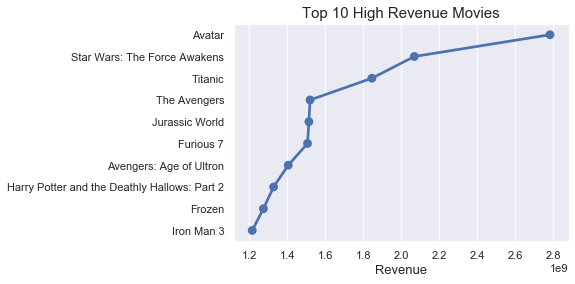

In [107]:
#top 10 movies which made highest revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['revenue'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

In [109]:
# to make sure the movies with low revenue, other than zero revenue are plotted
df["revenue"]=df["revenue"].replace(0,np.NaN)

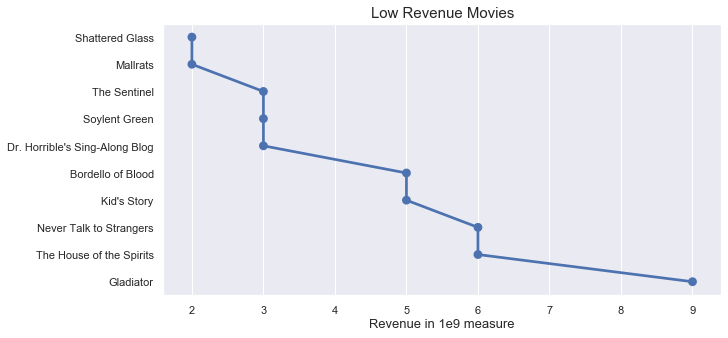

In [111]:

info = pd.DataFrame(df['revenue'].sort_values(ascending = True))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))


x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Low Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue in 1e9 measure",fontsize = 13)
sns.set_style("darkgrid")

## 2) Which are the movies with the second lowest and second highest budget?

In [197]:
#second highest budget
k=pd.DataFrame(df.drop_duplicates("budget").sort_values("budget",ascending=False))
p=np.array(k["budget"].nlargest(2))
s=pd.Series(k["original_title"][k["budget"]==p[1]])
list(s)
for val in s:
    print("Movie with second highest budget of "+str(p[1])+" is "+str(val))
    
#second lowest budget
p=np.array(k["budget"].nsmallest(2))
s=pd.Series(k["original_title"][k["budget"]==p[1]])
list(s)
for val in s:
    print("Movie with second lowest budget of "+str(p[1])+" is "+str(val))

Movie with second highest budget of 380000000.0 is Pirates of the Caribbean: On Stranger Tides
Movie with second lowest budget of 2.0 is Death Wish 2


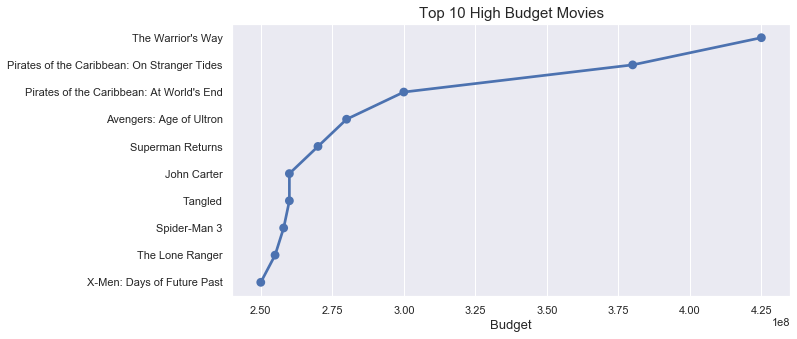

In [198]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

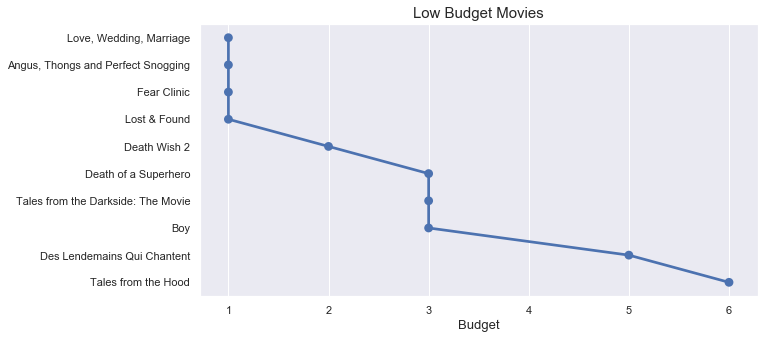

In [200]:
info = pd.DataFrame(df['budget'].sort_values(ascending = True))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))


x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Low Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

### 3) What is the average runtime of movies in the year 2000? 


In [218]:
a=pd.Series(df["runtime"][df["release_year"]==2000])
print("Movie runtimes in year 2000")
print(a.values)

k=df["runtime"][df["release_year"]==2000].mean()
print("Average runtime of movies in the year 2000 is "+str(k))

Movie runtimes in year 2000
[155 113 104 143 103 123  93  88  78 127  82  98  84 165  98 100 115 116
 110 118 131 108 106 109 118  89 111 118 102 122  74 112  98 102 140  93
 113 111 126 148  83 125  75 123 106   3 116 110 106 130  98 122  98 121
 113 106 114 107  99  76 102 118  96  90  99 145 119 119  74 130  99  90
 115  94 103 116  92 124 124  84  94  70  77  98  99 113  90 125  97 129
 130 128 136 101  96  82  94 108 100 106  89 127  84  97  91 417  87 292
 106 126  98 120 108 135 117  94 111 104  94  78  87 124  82  94  92  89
 107  90 124 122 108  86 107 102  84  94 112 110 107  93 115 134  99 115
 180  90  91  93  94  63  48 112 105  77  96  88 101  99  93  86  95 114
 110 119 104 110  96 100 103  88  87 105  91 121 103 130  96  57 101 105
 108  92 103 112  88 102  96  97 105  89  95  99  83 119 101  90 122  72
  95  10  92  96 130  74  88 106  90 111 117 103 133  90 122 102  89 103
  94   9 105 168  87  89  75]
Average runtime of movies in the year 2000 is 105.08968609865471


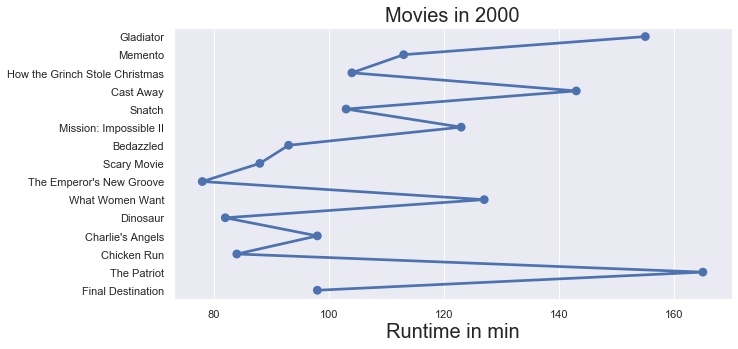

In [229]:
info = pd.DataFrame(df['runtime'][df["release_year"]==2000])
info['original_title'] =df['original_title']
data = list(map(str,(info['original_title'])))


x = list(data[:15])
y = list(info['runtime'][:15])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(5,10)})
ax.set_title("Movies in 2000",fontsize = 20)
ax.set_xlabel("Runtime in min",fontsize = 20)
sns.set_style("darkgrid")

### 4) Which movie had the most profit during 2000-2005?

In [239]:
df["profit"]=df["revenue"]-df["budget"]

In [249]:
z=pd.DataFrame(df.drop_duplicates("profit").sort_values("profit",ascending=False))
z_new=z.query("release_year>1999")
z_nnew=z_new.query("release_year<2006")
z_nnew

p=np.array(z_nnew["profit"].nlargest(2))
s=pd.Series(z_nnew["original_title"][z_nnew["profit"]==p[0]])
list(s)
for val in s:
    print("Movie with highest profit of "+str(p[0])+" in 2000-2005 is "+str(val))

Movie with highest profit of 1024888979.0 in 2000-2005 is The Lord of the Rings: The Return of the King


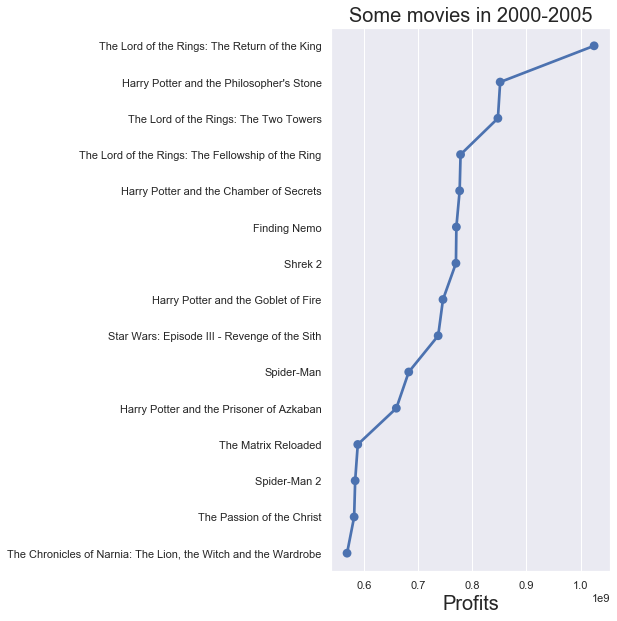

In [253]:
info = z_nnew

data = list(map(str,(info['original_title'])))


x = list(data[:15])
y = list(info['profit'][:15])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(5,10)})
ax.set_title("Some movies in 2000-2005",fontsize = 20)
ax.set_xlabel("Profits",fontsize = 20)
sns.set_style("darkgrid")